# k-means

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('House_Price_Regression.csv')

In [3]:
Data = Data.loc[:, ['latitude', 'longitude', 'price', 'size_in_m_2']]

Data.head()

,latitude,longitude,price,size_in_m_2
0,25.113208,55.138932,2700000,100.242337
1,25.106809,55.151201,2850000,146.972546
2,25.063302,55.137728,1150000,181.253753
3,25.227295,55.341761,2850000,187.664060
4,25.114275,55.139764,1729200,47.101821


In [21]:
def k_means(k , Data, random_seed, Distance, q=1):  # Por ahora el k máximo aceptado es k=4

#########################################################################################

# Librerias necesarias

    from sklearn.utils import resample

    import numpy as np

    import pandas as pd

    import math

#########################################################################################

    # Definición de las distancias:


    ## Distancia Euclidea:

    def Dist_Euclidea(x_i, x_r):

        Dist_Euclidea = ( ( x_i - x_r )**2 ).sum()

        Dist_Euclidea = np.sqrt(Dist_Euclidea)

        return Dist_Euclidea


    ## Distancia Minkowski:

    def Dist_Minkowski(x_i, x_r, q):

        Dist_Minkowski = ( ( ( abs( x_i - x_r) )**q ).sum() )**(1/q)

        return Dist_Minkowski


    ## Distancia Canberra:

    def Dist_Canberra(x_i, x_r):

        numerator =  abs( x_i - x_r )

        denominator =  ( abs(x_i) + abs(x_r) )
       
        numerator=np.array([numerator], dtype=float)

        denominator=np.array([denominator], dtype=float)

        # The following code is to eliminate zero division problems

        Dist_Canberra = ( np.divide( numerator , denominator , out=np.zeros_like(numerator), where=denominator!=0) ).sum() 

        return Dist_Canberra

   

#########################################################################################


    #Configuracion inicial aleatoria de los clusters:

    n=len(Data)


    elementos_clusterizados = []

    m = resample(range(0, n), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

    Cluster_0 = Data.loc[m,:]

    elementos_clusterizados.append(m)


##############################


    if k >= 2:


        # Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
        #  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.

        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_1 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_1 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 2 :

        pass

###############################

    if k >= 3:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_2 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_2 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 3 :

        pass

###############################

    if k >= 4:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_3 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_3 = Data.loc[m ,:]

            elementos_clusterizados.append(m)

    elif k < 4 :

          pass


#########################################################################################


    lista_clusters = [None] * 4

    lista_clusters[0] = Cluster_0
    lista_clusters[1] = Cluster_1
    lista_clusters[2] = Cluster_2
    lista_clusters[3] = Cluster_3

   # Calculo de centroides iniciales

    centroide_0 = lista_clusters[0].mean()
    centroide_1 = lista_clusters[1].mean()
    centroide_2 = lista_clusters[2].mean()
    centroide_3 = lista_clusters[3].mean()

   # Calculo de distancias para la observacion x_1

    x_1 = Data.iloc[0,:]

    if Distance == 'Euclidea' :

        distancia_0 = Dist_Euclidea(x_1 , centroide_0) 
        distancia_1 = Dist_Euclidea(x_1 , centroide_1) 
        distancia_2 = Dist_Euclidea(x_1 , centroide_2) 
        distancia_3 = Dist_Euclidea(x_1 , centroide_3)

    if Distance == 'Minkowski' :

        distancia_0 = Dist_Minkowski(x_1 , centroide_0, q)
        distancia_1 = Dist_Minkowski(x_1 , centroide_1, q) 
        distancia_2 = Dist_Minkowski(x_1 , centroide_2, q) 
        distancia_3 = Dist_Minkowski(x_1 , centroide_3, q)        

    if Distance == 'Canberra' :

        distancia_0 = Dist_Canberra(x_1 , centroide_0)
        distancia_1 = Dist_Canberra(x_1 , centroide_1) 
        distancia_2 = Dist_Canberra(x_1 , centroide_2) 
        distancia_3 = Dist_Canberra(x_1 , centroide_3)      

    # Calculo de cluster optimo para x_1

    df_distancias = pd.DataFrame({'Distancias' : [distancia_0, distancia_1 , distancia_2 , distancia_3], 'Cluster': [0,1,2,3]})

    df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=False)

    j_star = df_distancias_sort.iloc[0]['Cluster']

    j_star = int(j_star)


#########################################################################################

    i = 1

    while i <= n-2 :

        for j in range(0, k) :


           # Si x_i no esta en el cluster j --> pasamos a analizar otro cluster j

            if sum(lista_clusters[j].index == i-1) ==  0 :

                    pass


        # Si x_i esta en el cluster j y es el cluster optimo de x_i --> pasamos a x_i+1

            if ( sum(lista_clusters[j].index == i-1) != 0 )  & ( j_star == j ) :

            # Actualizamos i a i+1

                i = i + 1


            # calculamos las distancias entre x_i+1 y los centroides

                x_i = Data.iloc[ i ,:] # x_{i+1}

                if Distance == 'Euclidea' :

                    distancia_0 = Dist_Euclidea(x_i , centroide_0) 
                    distancia_1 = Dist_Euclidea(x_i , centroide_1) 
                    distancia_2 = Dist_Euclidea(x_i , centroide_2) 
                    distancia_3 = Dist_Euclidea(x_i , centroide_3)

                if Distance == 'Minkowski' :

                    distancia_0 = Dist_Minkowski(x_i , centroide_0, q)
                    distancia_1 = Dist_Minkowski(x_1 , centroide_1, q) 
                    distancia_2 = Dist_Minkowski(x_1 , centroide_2, q) 
                    distancia_3 = Dist_Minkowski(x_1 , centroide_3, q)        

                if Distance == 'Canberra' :

                    distancia_0 = Dist_Canberra(x_i , centroide_0)
                    distancia_1 = Dist_Canberra(x_i , centroide_1) 
                    distancia_2 = Dist_Canberra(x_i , centroide_2) 
                    distancia_3 = Dist_Canberra(x_i , centroide_3)     


               # Calculo de cluster optimo para x_1

                df_distancias = pd.DataFrame({'Distancias' : [distancia_0 , distancia_1 , distancia_2, distancia_3], 'Cluster': [0,1,2,3]})

                df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=False)

                j_star = df_distancias_sort.iloc[0]['Cluster']

                j_star = int(j_star)


        # Si x_i esta en el cluster j pero ese no es el cluster optimo de x_i 

            if ( sum(lista_clusters[j].index == i-1) != 0 )  & ( j_star != j ) : 

               ## Actualizamos los clusters:

               # Añadimos x_i al cluster j_star :

                lista_clusters[j_star] = pd.concat( [ lista_clusters[j_star] , lista_clusters[j].loc[i-1,:].to_frame().T ]  )  

            
               # Eliminamos x_1 del cluster j :

                lista_clusters[j] = lista_clusters[j].drop(i-1)   


              # Recalculo de centroides para la nueva configuracion de clusters

                centroide_0 = lista_clusters[0].mean()
                centroide_1 = lista_clusters[1].mean()
                centroide_2 = lista_clusters[2].mean()
                centroide_3 = lista_clusters[3].mean()

              # Recalculo de distancias de x_i respecto los centroides:

                x_i = Data.iloc[ i ,:] # x_i

                if Distance == 'Euclidea' :

                    distancia_0 = Dist_Euclidea(x_i , centroide_0) 
                    distancia_1 = Dist_Euclidea(x_i , centroide_1) 
                    distancia_2 = Dist_Euclidea(x_i , centroide_2) 
                    distancia_3 = Dist_Euclidea(x_i , centroide_3)

                if Distance == 'Minkowski' :

                    distancia_0 = Dist_Minkowski(x_i , centroide_0, q)
                    distancia_1 = Dist_Minkowski(x_i , centroide_1, q) 
                    distancia_2 = Dist_Minkowski(x_i , centroide_2, q) 
                    distancia_3 = Dist_Minkowski(x_i , centroide_3, q)        

                if Distance == 'Canberra' :

                    distancia_0 = Dist_Canberra(x_i , centroide_0)
                    distancia_1 = Dist_Canberra(x_i , centroide_1) 
                    distancia_2 = Dist_Canberra(x_i , centroide_2) 
                    distancia_3 = Dist_Canberra(x_i , centroide_3)    


# Clusters finales --> lista_clusters

    return(lista_clusters)

In [22]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Euclidea') # Tarda solo 18.8 segundos 

In [23]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
1004,25.087251,55.145574,2990000.0,162.208638
43,25.091487,55.172015,1150000.0,105.259099
1214,25.078367,55.140410,1650000.0,166.575079
351,25.111108,55.137591,1699000.0,124.304214
182,25.064767,55.138814,875000.0,123.282281
...,...,...,...,...
1871,25.099380,55.141275,1352888.0,69.212735
1877,25.072573,55.131009,1499000.0,175.029252
1879,25.203553,55.345554,890000.0,70.606280
1883,25.072569,55.126527,1970000.0,81.940446


In [24]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1282,25.198796,55.271342,2500000.0,168.804751
1476,25.081955,55.138863,690000.0,66.332742
1251,25.077150,55.135515,1550000.0,127.648722
1091,25.206412,55.275199,3950000.0,243.498763
...,...,...,...,...
1868,25.207533,55.277978,2300000.0,170.569908
1889,25.106668,55.149275,1400000.0,108.975219
1890,25.072954,55.128089,3800000.0,167.875721
1897,25.153080,55.254242,360000.0,55.741800


In [25]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
539,25.068729,55.139815,820000.0,59.457920
730,25.093469,55.173061,1220000.0,119.008743
1472,25.064191,55.216245,380000.0,63.081137
849,25.180869,55.271015,700000.0,66.239839
631,25.048095,55.206373,600205.0,74.786915
...,...,...,...,...
1573,25.078870,55.148529,1400000.0,157.006070
1857,25.078148,55.148277,400888.0,37.439909
1861,25.090987,55.385389,590000.0,101.635882
1864,25.081241,55.137946,2400000.0,171.127326


In [26]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
393,25.104115,55.148470,3150000.0,152.825435
397,24.999981,55.293818,930888.0,86.399790
404,25.233787,55.294217,1642777.0,92.717194
407,25.233787,55.294217,1550000.0,91.973970
415,25.076944,55.134135,2950000.0,139.633209
...,...,...,...,...
1891,25.226946,55.343628,7000000.0,377.929404
1893,25.073590,55.126352,2000000.0,79.617871
1894,25.191107,55.269910,980888.0,101.078464
1898,25.104330,55.148769,2700000.0,99.963628


In [27]:
lista_clusters[0].mean()

latitude       2.511612e+01
longitude      5.521077e+01
price          2.051995e+06
size_in_m_2    1.297637e+02
dtype: float64

In [28]:
lista_clusters[1].mean()

latitude       2.511925e+01
longitude      5.521314e+01
price          1.967974e+06
size_in_m_2    1.280963e+02
dtype: float64

In [29]:
lista_clusters[2].mean()

latitude       2.511636e+01
longitude      5.521152e+01
price          2.114565e+06
size_in_m_2    1.346380e+02
dtype: float64

In [30]:
lista_clusters[3].mean()

latitude       2.511513e+01
longitude      5.521413e+01
price          2.179182e+06
size_in_m_2    1.332627e+02
dtype: float64

In [31]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Minkowski', q=1)

In [32]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
382,25.196489,55.272126,15800000.0,488.019459
732,25.107984,55.244923,1700000.0,138.704179
1004,25.087251,55.145574,2990000.0,162.208638
1362,25.048660,55.209550,759000.0,83.148185
939,25.079900,55.131931,3615000.0,140.748045
...,...,...,...,...
1898,25.104330,55.148769,2700000.0,99.963628
1900,25.176892,55.310712,1500000.0,100.985561
1901,25.166145,55.276684,1230000.0,70.606280
1902,25.206500,55.345056,2900000.0,179.302790


In [33]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1810,25.094635,55.171817,1600000.0,166.946691
1466,25.183133,55.256580,1698000.0,140.469336
1476,25.081955,55.138863,690000.0,66.332742
1746,25.086376,55.147360,1300000.0,76.366266
...,...,...,...,...
1888,25.071504,55.128579,1300000.0,171.220229
1892,24.865992,55.137958,1175000.0,301.656041
1894,25.191107,55.269910,980888.0,101.078464
1897,25.153080,55.254242,360000.0,55.741800


In [34]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
291,25.193703,55.271223,2700000.0,120.773900
323,25.137198,55.189006,2008000.0,125.233244
8,25.106668,55.149275,2100000.0,203.085958
102,25.195461,55.269463,1900000.0,133.594514
107,25.081622,55.141977,1845000.0,125.047438
...,...,...,...,...
437,25.066791,55.203684,424340.0,35.767655
439,25.115747,55.142615,3175000.0,211.911743
440,25.086726,55.145205,1500000.0,141.677075
444,25.181311,55.262507,900000.0,96.247508


In [35]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
477,25.176670,55.272389,490000.0,52.304389
481,25.065886,55.138246,1700000.0,185.062776
484,25.082397,55.140660,1150000.0,129.692588
495,25.083330,55.144753,1575000.0,106.838450
502,25.090200,55.175145,750000.0,70.420474
507,25.193310,55.280919,2350000.0,172.613774
518,25.202977,55.280662,1430000.0,67.168869
527,25.184873,55.292277,1976504.0,108.231995
536,25.086886,55.173227,1999999.0,154.218980
551,25.189195,55.274878,1500000.0,121.981639


In [36]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Canberra')

In [37]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
1004,25.087251,55.145574,2990000.0,162.208638
43,25.091487,55.172015,1150000.0,105.259099
1214,25.078367,55.140410,1650000.0,166.575079
182,25.064767,55.138814,875000.0,123.282281
1846,25.195236,55.268641,3200000.0,158.771227
...,...,...,...,...
1883,25.072569,55.126527,1970000.0,81.940446
1885,25.103972,55.149621,31440000.0,607.771426
1889,25.106668,55.149275,1400000.0,108.975219
1890,25.072954,55.128089,3800000.0,167.875721


In [40]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1700,25.004936,55.296535,1088888.0,126.812595
1810,25.094635,55.171817,1600000.0,166.946691
1746,25.086376,55.147360,1300000.0,76.366266
1589,25.186038,55.291750,1349888.0,98.012665
...,...,...,...,...
1898,25.104330,55.148769,2700000.0,99.963628
1899,25.037477,55.221942,550000.0,78.688841
1900,25.176892,55.310712,1500000.0,100.985561
1902,25.206500,55.345056,2900000.0,179.302790


In [39]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
539,25.068729,55.139815,820000.0,59.457920
1070,25.233787,55.294217,1359000.0,91.973970
730,25.093469,55.173061,1220000.0,119.008743
786,25.086376,55.147360,2587000.0,112.505533
1472,25.064191,55.216245,380000.0,63.081137
...,...,...,...,...
1827,25.050227,55.213350,699505.0,78.038520
1828,25.137409,55.188957,2121000.0,128.020334
1831,25.073151,55.136982,950000.0,78.131423
1849,25.071246,55.140806,499000.0,62.430816


In [38]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
337,25.273623,55.283576,1500888.0,192.309210
348,25.192522,55.266317,799900.0,91.881067
393,25.104115,55.148470,3150000.0,152.825435
397,24.999981,55.293818,930888.0,86.399790
415,25.076944,55.134135,2950000.0,139.633209
...,...,...,...,...
1852,25.069265,55.128568,700000.0,54.905673
1856,25.071436,55.136065,1500000.0,224.082036
1858,25.078148,55.148277,760888.0,83.984312
1861,25.090987,55.385389,590000.0,101.635882


# k-medias con PyClustering

In [41]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [51]:
kmeans = KMeans(n_clusters=4, random_state=123).fit(Data.values)

In [66]:
kmeans.labels_

array([2, 2, 0, ..., 2, 0, 0])

In [82]:
kmeans.cluster_centers_

array([[2.51092305e+01, 5.52118746e+01, 1.27295902e+06, 1.07661108e+02],
       [2.51522213e+01, 5.52146856e+01, 1.57861780e+07, 4.06382170e+02],
       [2.51475986e+01, 5.52146808e+01, 3.83976411e+06, 2.04617388e+02],
       [2.51364225e+01, 5.51935103e+01, 3.22573333e+07, 7.25309205e+02]])

In [90]:
kmeans.inertia_ # suma de varianzas intra-cluster, para la configuracion final de clusters

1571239526592098.5

In [ ]:
silhouette_score(Data.values, cluster_labels)

In [88]:
kmeans.predict([[2.5, 5.5, 32000000, 725], [2.5, 5.5, 16000000, 725]])

array([3, 1])

In [72]:
import numpy as np

In [85]:
distances = []

k = 4

for j in range(0, k):

    distances.append( np.sqrt( ((kmeans.cluster_centers_[j] - [2.5, 5.5, 32000000, 725] )**2 ).sum() ) )

In [86]:
distances

[30727040.986832548, 16213821.976906829, 28160235.89410166, 257333.3391272728]

In [87]:
np.where(distances == min( distances ) ) 

(array([3], dtype=int64),)

In [111]:
sum_variance_intra_cluster = []

for j in range(2,21):

    kmeans = KMeans(n_clusters = j , random_state=123).fit(Data.values)

    sum_variance_intra_cluster.append( kmeans.inertia_ )

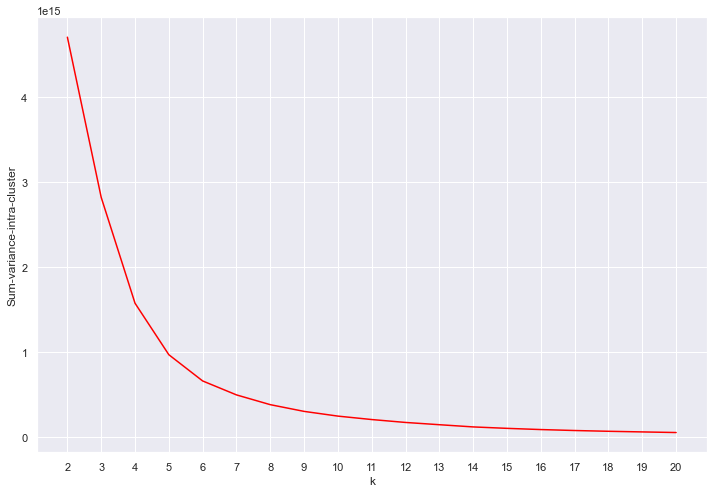

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.set(rc={'figure.figsize':(12, 8)})

In [ ]:
p=sns.lineplot(x=range(2,21), y=sum_variance_intra_cluster, color='red')

plt.ylabel("Sum-variance-intra-cluster")
plt.xlabel("k")

p.set_xticks( range(2,21) )

plt.show()

In [116]:
silhouette_avg = []

for j in range(2,21):

    kmeans = KMeans(n_clusters = j , random_state=123).fit(Data.values)

    cluster_labels = kmeans.labels_

    silhouette_avg.append( silhouette_score(Data.values, cluster_labels) )

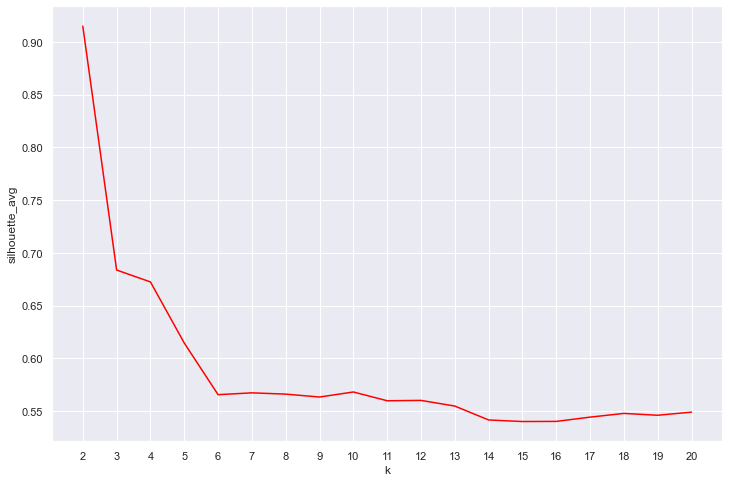

In [117]:
p=sns.lineplot(x=range(2,21), y=silhouette_avg , color='red')

plt.ylabel("mean silhouette")
plt.xlabel("k")

p.set_xticks( range(2,21) )

plt.show()

# k-medoids

In [15]:
#Configuracion inicial aleatoria de los clusters:

n=len(Data)

k=4

elementos_clusterizados = []

m = resample(range(0, n), n_samples=math.floor(n/k) , replace=False, random_state=123)

Cluster_0 = Data.loc[m,:]

elementos_clusterizados.append(m)


###################################################################################


if k >= 2:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_1 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_1 = Data.loc[m,:]

        elementos_clusterizados.append(m)

elif k < 2 :

    pass

###################################################################################

if k >= 3:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_2 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_2 = Data.loc[m,:]

        elementos_clusterizados.append(m)

elif k < 3 :

    pass

###################################################################################

if k >= 4:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_3 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_3 = Data.loc[m ,:]

        elementos_clusterizados.append(m)

elif k < 4 :

    pass

In [16]:
lista_clusters = [None] * 4

lista_clusters[0] = Cluster_0
lista_clusters[1] = Cluster_1
lista_clusters[2] = Cluster_2
lista_clusters[3] = Cluster_3

In [53]:
distancias_clusters_0 =  np.empty((len(lista_clusters[0]), len(lista_clusters[0])))

distancias_clusters_0[:] = 0

for i in range(0, len(lista_clusters[0])) :

    for r in  range(0, len(lista_clusters[0])) :

            distancias_clusters_0[i,r] = sum( (lista_clusters[0].iloc[i , :] - lista_clusters[0].iloc[r , :])**2 )


# Para el cluster 0 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_0 = []

for i in range(0, distancias_clusters_0.shape[0]):

    suma_distancias_cluster_0.append( distancias_clusters_0[i,:].sum() )


medoids =[]

# np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] 
# es la fila de la matriz de distancias en la que esta la observacion x_i que minimiza 
# la suma de distancias entre x_i y el resto de observaciones del cluster 0


# lista_clusters[0].iloc[ np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] , :].index 
# es el vérdadero índice de la observacion x_i que minimiza la suma de distancias entre x_i y el resto de obs del cluster 0

medoids.append( lista_clusters[0].iloc[ np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] , :].index )


##########################################################################################

distancias_clusters_1 =  np.empty((len(lista_clusters[1]), len(lista_clusters[1])))

distancias_clusters_1[:] = 0

for i in range(0, len(lista_clusters[1])) :

    for r in  range(0, len(lista_clusters[1])) :

            distancias_clusters_1[i,r] = sum( (lista_clusters[1].iloc[i , :] - lista_clusters[1].iloc[r , :])**2 )



# Para el cluster 1 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_1 = []

for i in range(0, distancias_clusters_1.shape[0]):

    suma_distancias_cluster_1.append( distancias_clusters_1[i,:].sum() )


medoids.append( lista_clusters[1].iloc[ np.where(suma_distancias_cluster_1 == min( suma_distancias_cluster_1 ) )[0] , :].index )

##########################################################################################

distancias_clusters_2 =  np.empty((len(lista_clusters[2]), len(lista_clusters[2])))

distancias_clusters_2[:] = 0

for i in range(0, len(lista_clusters[2])) :

    for r in  range(0, len(lista_clusters[2])) :

            distancias_clusters_2[i,r] = sum( (lista_clusters[2].iloc[i , :] - lista_clusters[2].iloc[r , :])**2 )



# Para el cluster 2 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_2 = []

for i in range(0, distancias_clusters_2.shape[0]):

    suma_distancias_cluster_2.append( distancias_clusters_2[i,:].sum() )


medoids.append( lista_clusters[2].iloc[ np.where(suma_distancias_cluster_2 == min( suma_distancias_cluster_2 ) )[0] , :].index )

##########################################################################################

distancias_clusters_3 =  np.empty((len(lista_clusters[3]), len(lista_clusters[3])))

distancias_clusters_3[:] = 0

for i in range(0, len(lista_clusters[3])) :

    for r in  range(0, len(lista_clusters[3])) :

            distancias_clusters_3[i,r] = sum( (lista_clusters[3].iloc[i , :] - lista_clusters[3].iloc[r , :])**2 )



# Para el cluster 3 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_3 = []

for i in range(0, distancias_clusters_3.shape[0]):

    suma_distancias_cluster_3.append( distancias_clusters_3[i,:].sum() )


medoids.append( lista_clusters[3].iloc[ np.where(suma_distancias_cluster_3 == min( suma_distancias_cluster_3 ) )[0] , :].index )


In [54]:
medoids 

# Ha tardado 7.38 mins en calcular los medoids, tarda demasiado. 
#Si tarda esto cada vez que se tengan que actualizar los medoids, usar el codigo anterior de k-means para k-medoids no será util en la practica por el coste de computacion

[Int64Index([1002], dtype='int64'),
 Int64Index([67], dtype='int64'),
 Int64Index([1775], dtype='int64'),
 Int64Index([198], dtype='int64')]